In [1]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
import pickle

In [3]:
import time
import multiprocessing as mp

In [4]:
import numpy as np

In [5]:
def load_data(data_name):
    f = open(data_name,'rb')
    data = pickle.load(f)
    return data

In [6]:
def get_doc(text_para):
    text_doc = []
    for d in text_para:
        text_doc.append(d)
    return ' '.join(text_doc)

In [7]:
def _create_frequency_table(text_string):

    stopWords = set(stopwords.words("english"))
    words = word_tokenize(text_string)
    ps = PorterStemmer()

    freqTable = dict()
    for word in words:
        word = ps.stem(word)
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    return freqTable

In [8]:
def _score_sentences(sentences, freqTable):
    sentenceValue = dict()

    for sentence in sentences:
        word_count_in_sentence = (len(word_tokenize(sentence)))
        for wordValue in freqTable:
            if wordValue in sentence.lower():
                if sentence[:10] in sentenceValue:
                    sentenceValue[sentence[:10]] += freqTable[wordValue]
                else:
                    sentenceValue[sentence[:10]] = freqTable[wordValue]

        sentenceValue[sentence[:10]] = sentenceValue[sentence[:10]] // word_count_in_sentence

    return sentenceValue

In [9]:
def _find_average_score(sentenceValue) -> int:
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    if len(sentenceValue) != 0:
        average = int(sumValues / len(sentenceValue))
    else: average = 0

    return average

In [10]:
def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = []

    for sentence in sentences:
        if sentence[:10] in sentenceValue and sentenceValue[sentence[:10]] > (threshold):
            summary.append(sentence) 
            sentence_count += 1
            
    if sentence_count == 0:
        summary = sentences

    return summary

In [11]:
# def get_summary_2(item):
#     text = item[0]
#     doc = get_doc(text)
#     frq_tb = _create_frequency_table(doc)
#     print(frq_tb)
#     value = _score_sentences(text, frq_tb)
#     print(value)
#     threshold = _find_average_score(value)
#     print(threshold)
#     smr = _generate_summary(text, value, threshold)
#     return (item[0], item[1], item[2], item[3], smr)

In [12]:
def get_summary(item1, item2, item3, item4):
    text = item1
    doc = get_doc(text)
    frq_tb = _create_frequency_table(doc)
    value = _score_sentences(text, frq_tb)
    threshold = _find_average_score(value)
    smr = _generate_summary(text, value, threshold)
    return (item1, item2, item3, item4, smr)

In [13]:
raw_data = load_data('/home/jujun/fraudprediction_10k/data/rm_name/data_20200309_2012_rmname')

In [14]:
len(raw_data)

56288

In [15]:
threads = 0
finishes = 0
pool=mp.Pool(processes=15)
results = []
text_smr = []
start= time.time()
n = len(raw_data)

for i in np.arange(n):
#     print('c', len(itm))
#     print(itm)
    threads += 1
    if threads%1000 == 0:
        print("send process {}".format(threads))
      
    results.append(pool.apply_async(get_summary, args = (raw_data[i])))

for rs in results:
    finishes+=1
    if finishes%1000 == 0:
        print("finish process {} @ {}".format(finishes, time.time()-start))
    text_smr.append(rs.get())   

send process 1000
send process 2000
send process 3000
send process 4000
send process 5000
send process 6000
send process 7000
send process 8000
send process 9000
send process 10000
send process 11000
send process 12000
send process 13000
send process 14000
send process 15000
send process 16000
send process 17000
send process 18000
send process 19000
send process 20000
send process 21000
send process 22000
send process 23000
send process 24000
send process 25000
send process 26000
send process 27000
send process 28000
send process 29000
send process 30000
send process 31000
send process 32000
send process 33000
send process 34000
send process 35000
send process 36000
send process 37000
send process 38000
send process 39000
send process 40000
send process 41000
send process 42000
send process 43000
send process 44000
send process 45000
send process 46000
send process 47000
send process 48000
send process 49000
send process 50000
send process 51000
send process 52000
send process 53000
se

In [16]:
text_smr[200]

(['  derivative financial instruments.we do not hold or issue derivative financial instruments for trading purposes.we have used derivative financial instruments to manage our exposure to fluctuations in interest rates.neither the aggregate value of these derivative financial instruments nor the market risk posed by them has been material to our business.at december dd , dd , we were not using any derivative financial instruments .',
  'interest rate exposure.based on our overall interest rate exposure during the year ended december31 , dd and assuming similar interest rate volatility in the future , a near - term ( dd ) change in interest rates would not materially affect our consolidated financial position , results of operation or cash dd of december dd , dd , we had no amounts outstanding under our credit facility and therefore no interest rate exposure .',
  "foreign exchange exposure.our revenue , expense and capital purchasing activities are primarily transacted in u.s . dollars

In [17]:
with open('data_20200309_2012_rmname_smr', 'wb') as fp:
     pickle.dump(text_smr, fp)
fp.close()

In [49]:
temp_smr = []
for i in text_smr:
    temp_smr.append(i[4])

In [50]:
len(temp_smr)

56288

In [52]:
with open('data_20200309_2012_rmname_smr_temp', 'wb') as fp:
     pickle.dump(temp_smr, fp)
fp.close()

In [53]:
labels_smr = []
for i in text_smr:
    labels_smr.append(i[1])

In [55]:
labels_smr[0]

0

In [56]:
with open('data_20200309_2012_rmname_smr_labels', 'wb') as fp:
     pickle.dump(labels_smr, fp)
fp.close()

In [18]:
import re

In [27]:
text_smr_test = text_smr[199:202]

In [38]:
num_word_para = []
num_para = []
for t in text_smr:
    #print(len(t))
    smr = t[4]
    #print(len(smr))
    num_para.append(len(smr))
    #print(num_para)
    for s in smr:
        num_word_para.append(len(re.findall("[a-zA-Z_]+", s)))

In [39]:
len(num_para)

56288

In [40]:
import matplotlib.pyplot as plt

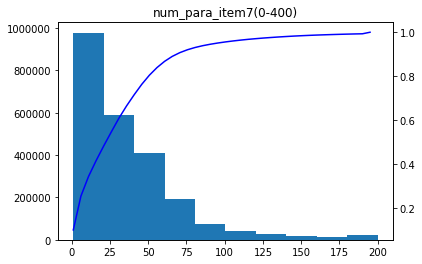

In [48]:
plot_data = np.clip(num_word_para,0,200)

fig, ax1 = plt.subplots()
ax1.hist(plot_data)

ax2 = ax1.twinx()
values, base = np.histogram(plot_data, bins=40)
cumulative = np.cumsum(values)/len(plot_data)
plt.plot(base[:-1], cumulative, c='blue')
plt.title('num_para_item7(0-400)')
plt.show()

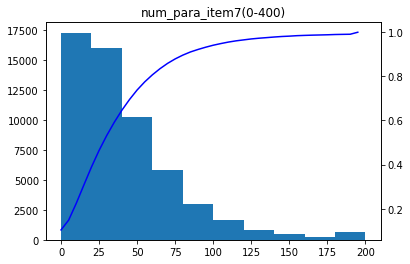

In [47]:
plot_data = np.clip(num_para,0,200)

fig, ax1 = plt.subplots()
ax1.hist(plot_data)

ax2 = ax1.twinx()
values, base = np.histogram(plot_data, bins=40)
cumulative = np.cumsum(values)/len(plot_data)
plt.plot(base[:-1], cumulative, c='blue')
plt.title('num_para_item7(0-400)')
plt.show()